In [37]:
#Importing and checking some libraries
import sys
import numpy 
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print("Python: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("Pandas: {}".format(pandas.__version__))
print("Scipy: {}".format(scipy.__version__))
print("Seaborn: {}".format(seaborn.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))
print("Sklearn: {}".format(sklearn.__version__))



Python: 3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 21:41:56) 
[GCC 7.3.0]
Numpy: 1.15.2
Pandas: 0.23.4
Scipy: 1.1.0
Seaborn: 0.9.0
Matplotlib: 3.0.0
Sklearn: 0.20.0


In [38]:
#importing some important library as sort form
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Loading Datasets from kaggel 
data =pd.read_csv("creditcard.csv")

In [40]:
#Going through the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [41]:
print(data.shape)
#284807 credit card transaction with 31 columns

(284807, 31)


In [42]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [43]:
data= data.sample(frac=0.3,random_state=1)
print(data.shape)

(85442, 31)


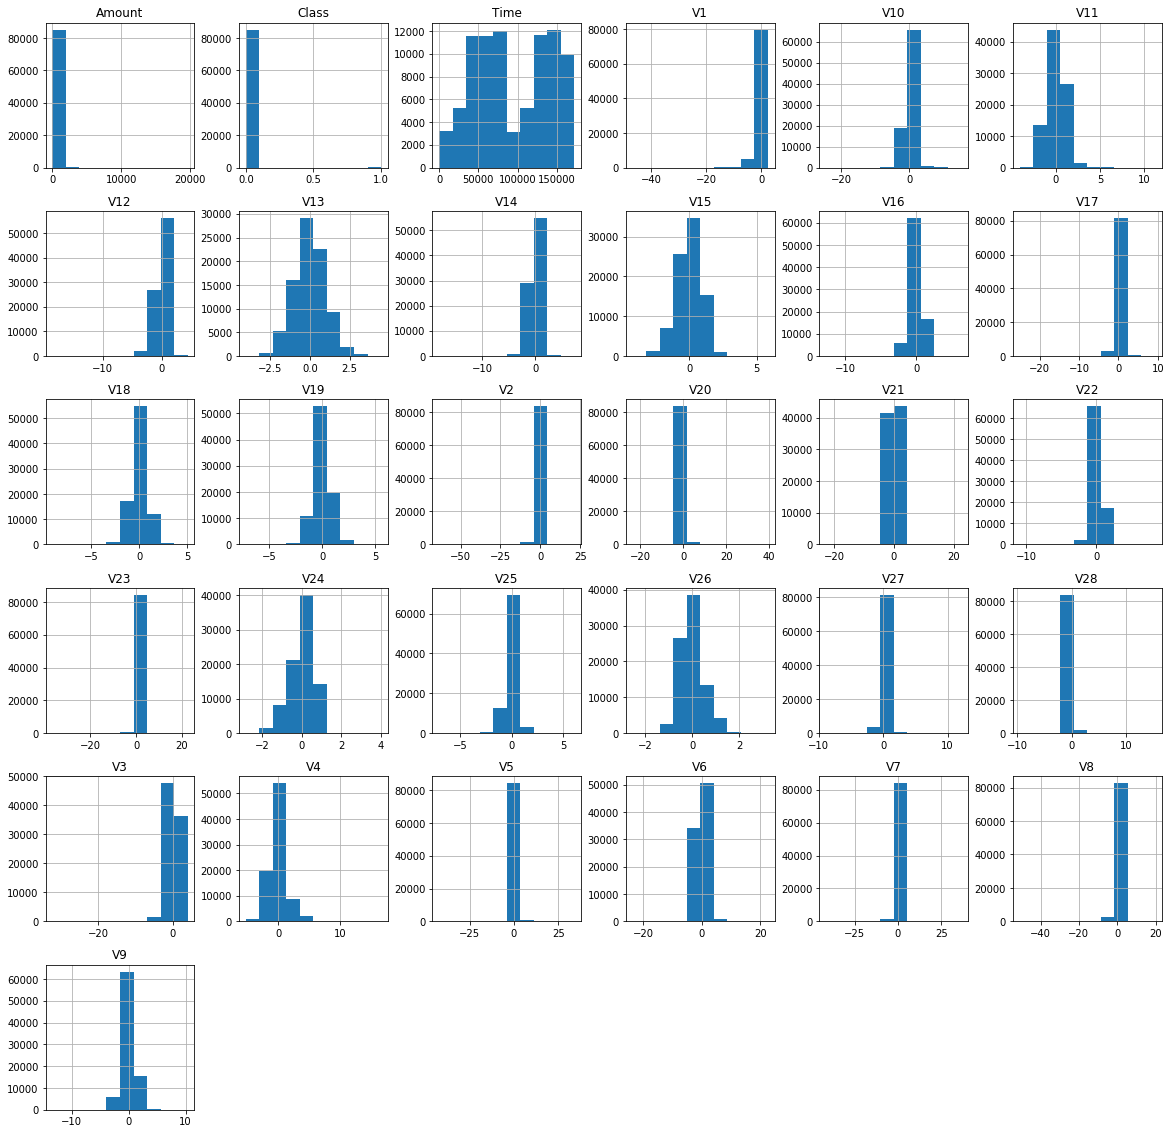

In [44]:
#ploting histogarm for each datavalue
data.hist(figsize=(20,20))
plt.show()

In [45]:
#determining fraudaluent cases in database
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

outlier_fraction=len(fraud)/float(len(valid))
print(outlier_fraction)
print("Fraud cases: {}".format(len(fraud)))
print("Valid cases: {}".format(len(valid)))



0.001582519605659559
Fraud cases: 135
Valid cases: 85307


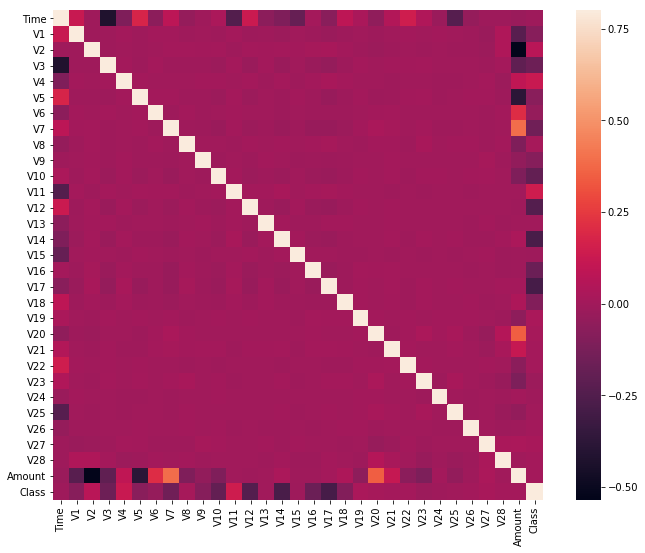

In [46]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax= .8,square =True)

In [47]:
#Get all the column from the dataset
columns=data.columns.tolist()
#Filtering the column which we dont want
column=[c for c in columns if c not in ['Class']]
#store the variable in which we waant to predict
target='Class'
X=data[columns]
Y=data[target]
#print the shape of X and Y
print(X.shape)
print(Y.shape)


(85442, 31)
(85442,)


In [48]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#defining state
state=1
#defining the outlier finding method
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    "Local outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination = outlier_fraction, novelty=True)
}

In [49]:
#fiting the model
n_outlier=len(fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outlier
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.neagtive_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
    
    #changing the value of 0 for valid and 1 for fraud
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    n_error = (y_pred!=Y).sum()
    
    #Running the classifiction matrics
    print("{}{}".format(clf_name,clf))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Local outlier FactorLocalOutlierFactor(algorithm='auto', contamination=0.001582519605659559,
          leaf_size=30, metric='minkowski', metric_params=None,
          n_jobs=None, n_neighbors=20, novelty=True, p=2)
0.997155965450247
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.03      0.02      0.02       135

   micro avg       1.00      1.00      1.00     85442
   macro avg       0.51      0.51      0.51     85442
weighted avg       1.00      1.00      1.00     85442



/home/om/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/om/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation ForestIsolationForest(behaviour='old', bootstrap=False,
        contamination=0.001582519605659559, max_features=1.0,
        max_samples=85442, n_estimators=100, n_jobs=None, random_state=1,
        verbose=0)
0.998022050045645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.38      0.38      0.38       135

   micro avg       1.00      1.00      1.00     85442
   macro avg       0.69      0.69      0.69     85442
weighted avg       1.00      1.00      1.00     85442

